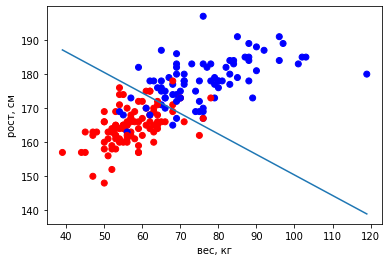

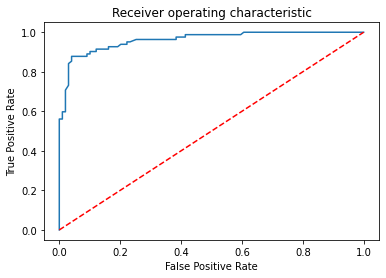

Coefficients: 
 [-58.03319918] [[0.16591461 0.27557928]]
Coefficient of precision: 0.90
Coefficient of recall: 0.88


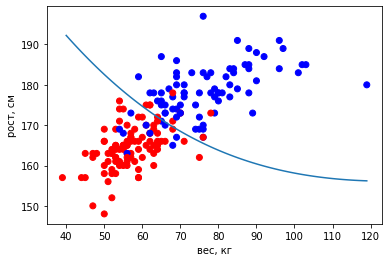

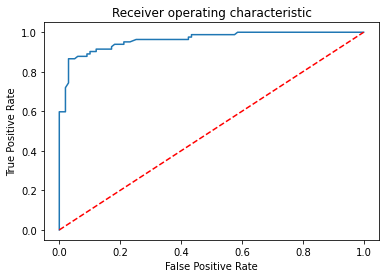

Coefficients: 
 [-0.00349398] [[-0.11224792 -0.29908018 -0.0011234   0.00250718  0.00120429]]
Coefficient of precision: 0.90
Coefficient of recall: 0.88


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col = 0).dropna()

X = ds[['weight', 'height']].values.reshape(-1, 2)
Y = ds['sex'].replace(['F','M'],[0, 1]).values.reshape(-1, 1).ravel()

reg = LogisticRegression().fit(X, Y)

colors = ds['sex'].map({'M': 'b', 'F': 'r'})
plt.scatter(x = ds['weight'], y = ds['height'], c = colors)
def line(c, x):
  return -(x*c.coef_[0][0] + c.intercept_) / c.coef_[0][1]
xmin, xmax = ds['weight'].min(), ds['weight'].max()
plt.plot([xmin, xmax], [line(reg, xmin), line(reg, xmax)])
plt.xlabel('вес, кг'); plt.ylabel('рост, см')

fpr, tpr, thresholds = metrics.roc_curve(Y, reg.predict_proba(X)[:, 1])
plt.figure();plt.plot(fpr, tpr);plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

Y_p = reg.predict(X)
print('Coefficients: \n', reg.intercept_, reg.coef_)
print('Coefficient of precision: %.2f' % metrics.precision_score(Y, Y_p))
print('Coefficient of recall: %.2f' % metrics.recall_score(Y, Y_p))



ds['w^2'] = pd.Series(pow(ds['weight'], 2), index=ds.index)
ds['w*h'] = pd.Series(ds['height'] * ds['weight'], index=ds.index)
ds['h^2'] = pd.Series(pow(ds['height'], 2), index=ds.index)
X2 = ds[['weight', 'height', 'w^2', 'w*h', 'h^2']].values.reshape(-1, 5)
Y = ds['sex'].replace(['F','M'],[0, 1]).values.reshape(-1, 1).ravel()

reg = LogisticRegression().fit(X2, Y)

colors = ds['sex'].map({'M': 'b', 'F': 'r'})
plt.scatter(x = ds['weight'], y = ds['height'], c = colors)
c = reg.coef_.ravel();
import warnings; warnings.filterwarnings("ignore")
Z = []; R = []
for i in range(40, 120):
  Z.append(np.roots([c[4], c[1] + i*c[3], reg.intercept_+ i*c[0] + i*i*c[2]])[0]); R.append(i)
plt.plot(R, Z);plt.xlabel('вес, кг'); plt.ylabel('рост, см')

fpr, tpr, thresholds = metrics.roc_curve(Y, reg.predict_proba(X2)[:, 1])
plt.figure();plt.plot(fpr, tpr);plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

Y_p = reg.predict(X2)
print('Coefficients: \n', reg.intercept_, reg.coef_)
print('Coefficient of precision: %.2f' % metrics.precision_score(Y, Y_p))
print('Coefficient of recall: %.2f' % metrics.recall_score(Y, Y_p))